<a href="https://colab.research.google.com/github/genki3ng/ADS-Training/blob/main/CW_ADS_Track_CASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADS_Track_CASE1**  

*by Congyang Wang*  
*latest update: 07/13/2021*  

# Business Statement

**Introduction:**
Wayfair launched Design Services platform mid-2018 to help customers seek expert interior
design advice at minimal cost.  

**Problem Statement:**
Business would like to identify customers who have high likelihood to buy Design Services so
that they can be more precise in their targeting on Wayfair.com

**Goal:**
Based on provided attributes of user’s browsing behavior on Wayfair’s website, find out who is the right customer to target for Design
Services


# EDA

Check the quality of the data  
Clean data

In [1]:
# dateset path
# "/content/drive/MyDrive/design_services_dataset_wB1.csv"

import numpy as np
import pandas as pd

import matplotlib.colors as mcolors
from importlib import reload #for dev
import matplotlib.pyplot as plt
import seaborn as sns # for correlation matrix

%matplotlib inline


In [2]:
# read data file
df = pd.read_csv("/content/drive/MyDrive/design_services_dataset_wB1.csv")
df.head()


,customer_id,num_items_list,num_lists,avg_session_length,InMarketscore,geos,Avg_brand_pages_viewed,Avg_design_classes_per_session,HolidayShoppers,Avg_SuperBrowse_Pages_per_session,Visitor_type,life_style_brand_user,gender,AvgDailySalesPagesViewedPerSession,Avg_Shop_the_look_sess_With_DSRoom,AvgPDPInfoInteractionPerSession,Avg_RoomPlanner_session,Max_Design_services_ATC_perSession,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,DS_customer_flag
0,583266,1,0.0,687.680478,NaN,Rural,NaN,NaN,0,0.000000,Active,NaN,Female,0.0,NaN,NaN,0.000000,4.0,0.0,NaN,0.0,NaN,0.129386,0
1,507698,1,2.0,1066.967614,NaN,Rural,NaN,NaN,0,0.000000,Active,NaN,Female,0.0,NaN,NaN,0.037361,6.0,0.0,NaN,NaN,1.0,0.166618,0
2,889449,1,0.0,2097.104262,NaN,NaN,NaN,NaN,0,0.000000,Acquired,1.0,Female,0.0,NaN,0.4,0.000193,7.0,0.0,NaN,1.0,1.0,0.296956,0
3,477756,2,0.0,64.789735,NaN,NaN,NaN,NaN,0,0.333333,New,NaN,NaN,0.0,NaN,NaN,0.133602,2.0,0.0,NaN,4.0,4.0,0.126711,0
4,557413,0,2.0,853.492792,NaN,NaN,NaN,NaN,0,30.500000,Returning,NaN,Female,0.0,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,1.0,0.420142,0


In [3]:
# Count the number of missing values in each column of a dataframe
# and drop 
df.isnull().sum()/len(df)*100

customer_id                            0.000000
num_items_list                         0.000000
num_lists                              8.528441
avg_session_length                     0.000000
InMarketscore                         82.594547
geos                                  51.391452
Avg_brand_pages_viewed                98.047920
Avg_design_classes_per_session        86.560446
HolidayShoppers                        0.000000
Avg_SuperBrowse_Pages_per_session      6.727794
Visitor_type                           0.000000
life_style_brand_user                 82.649169
gender                                11.500079
AvgDailySalesPagesViewedPerSession     9.385333
Avg_Shop_the_look_sess_With_DSRoom    77.740715
AvgPDPInfoInteractionPerSession       45.620018
Avg_RoomPlanner_session                0.000000
Max_Design_services_ATC_perSession     8.339193
Avg_STLPage_per_Session                0.000000
AvgPDPInteraction                     56.792535
AvgDSRelevantClasses                  14

In [4]:
# cehck the missing value situation for confirmed DS customer only
# it's similiar to full dataset, so no action needed.
# df_dscustomer = df.loc[df['DS_customer_flag'] == 1]
# df_dscustomer.isnull().sum()/len(df_dscustomer)*100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf19a15fd0>,
      dtype=object)

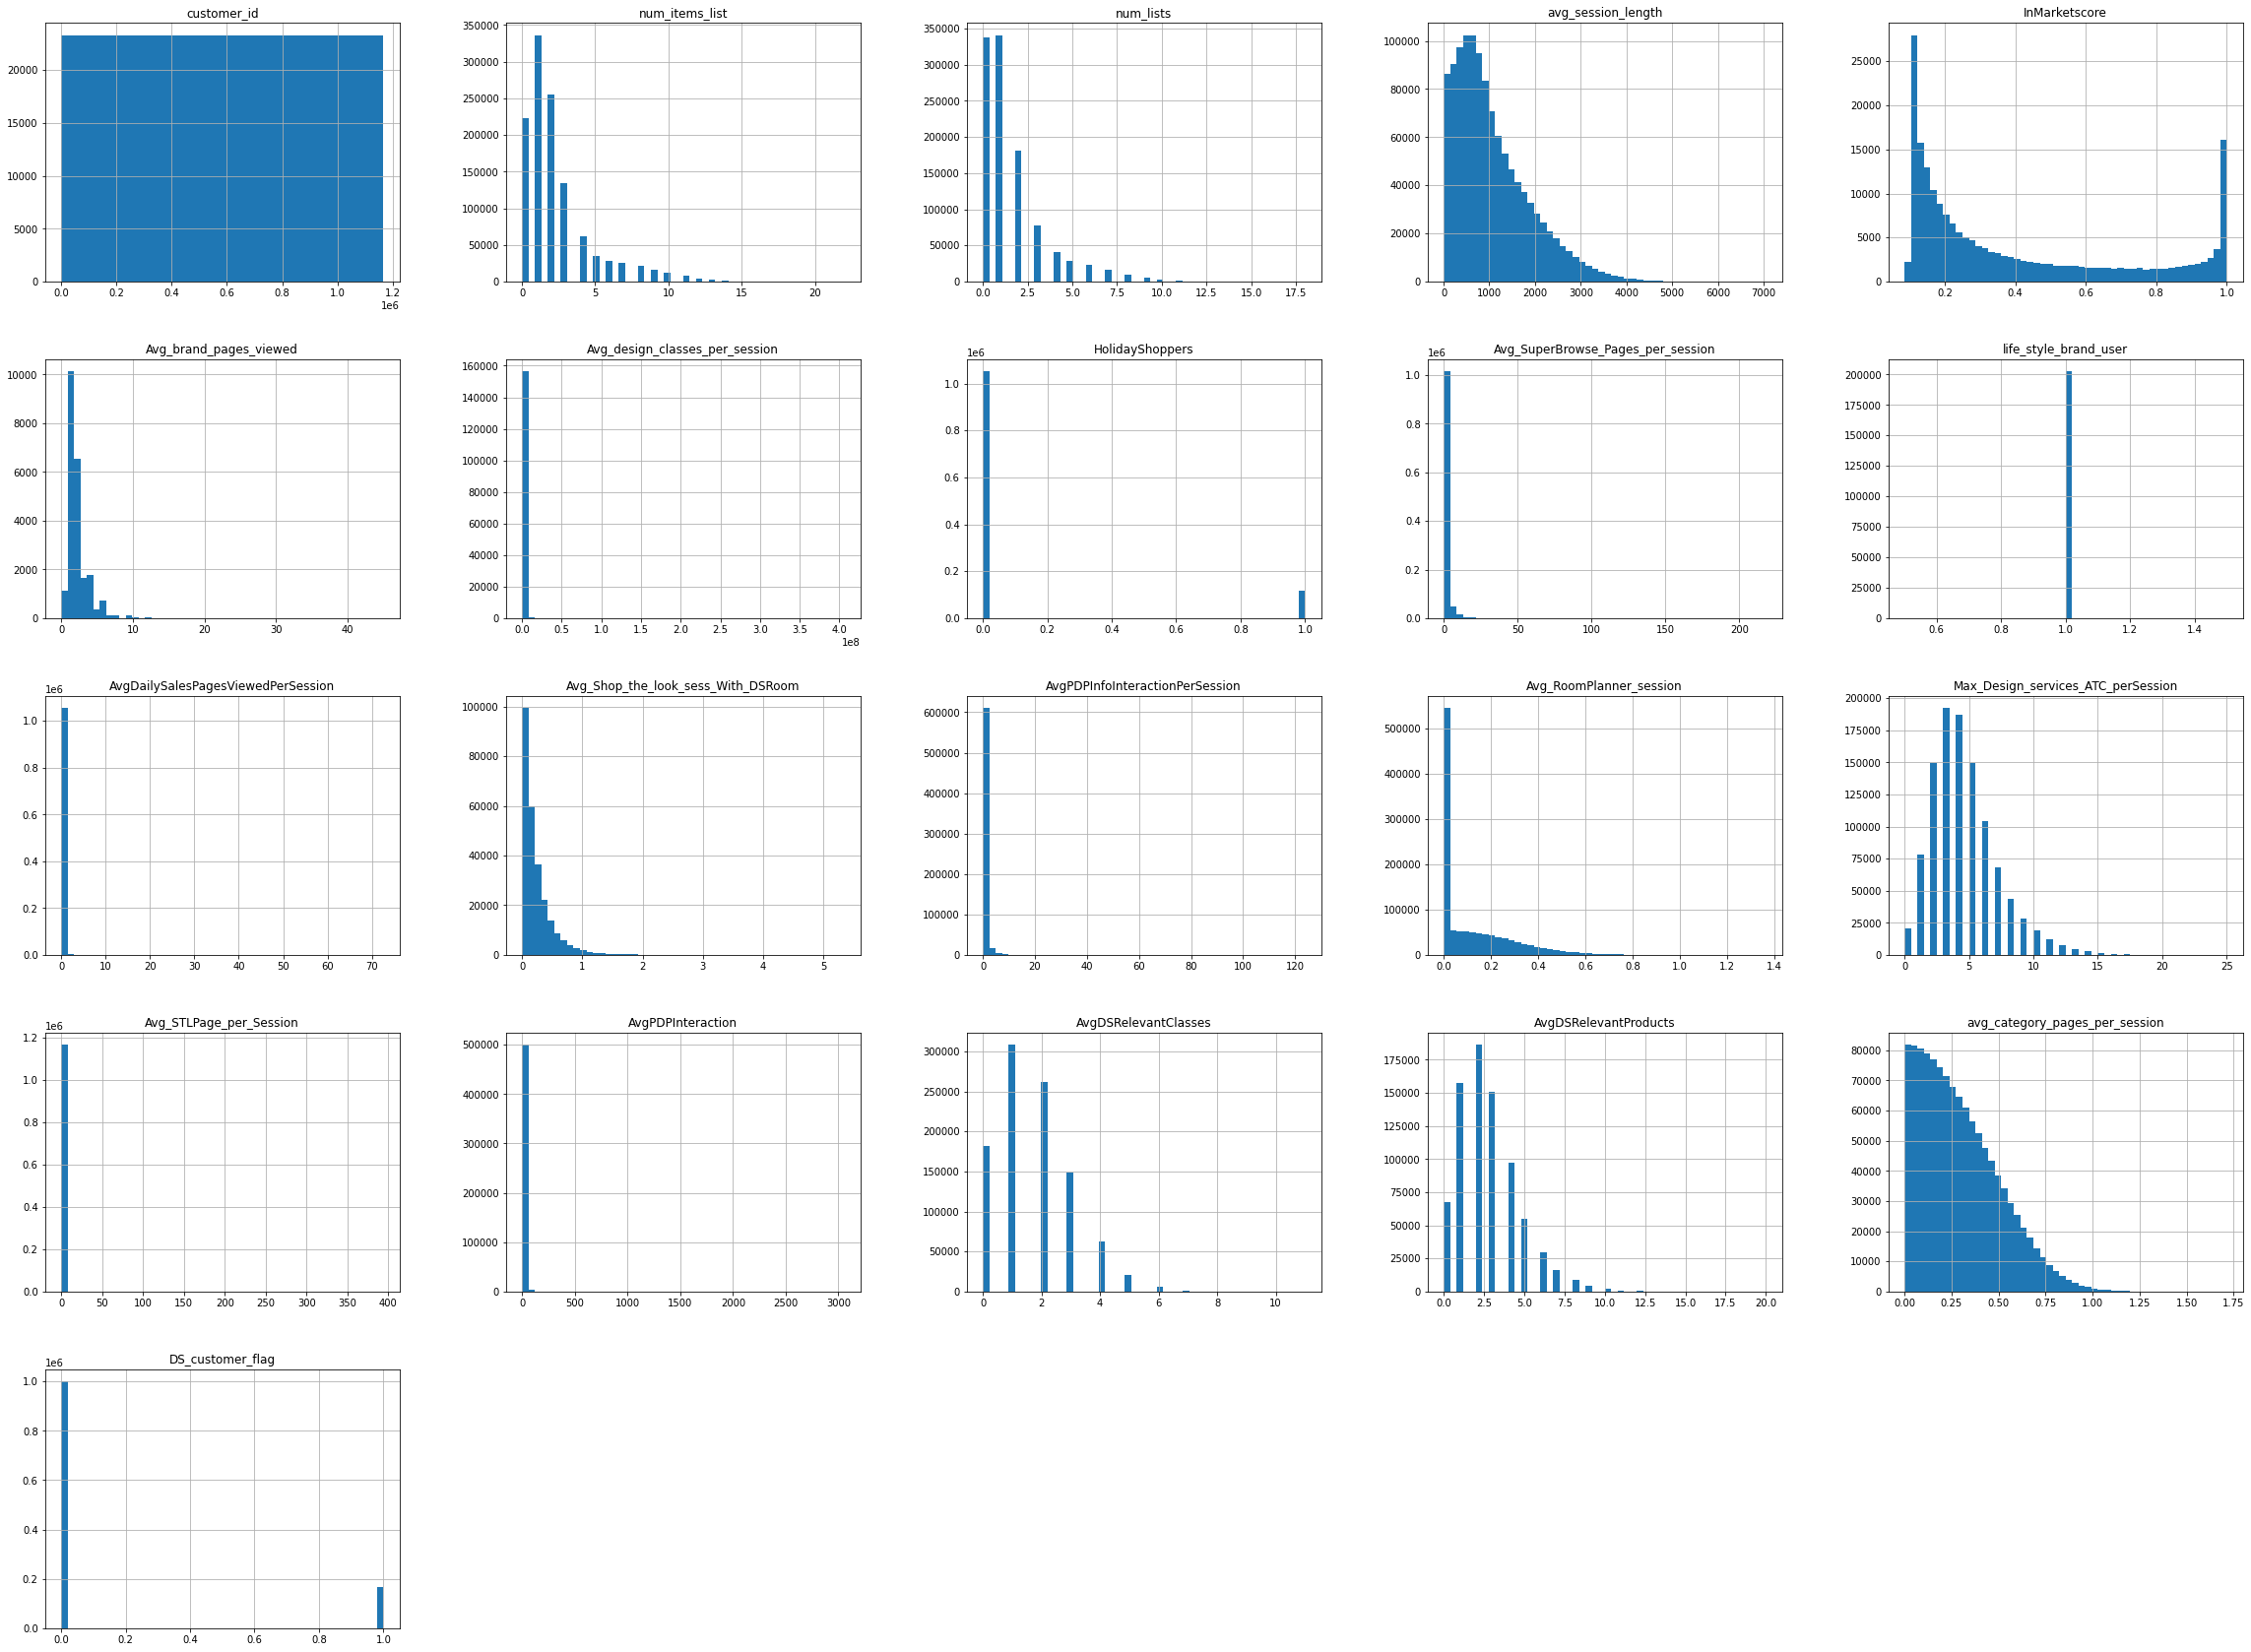

In [5]:
# check the hist for all features
df.hist(bins=50, figsize=(40, 30))

In [6]:
# copy a new dataframe
df2 = df.copy(deep=True)

In [7]:
# give categorical features a Unknown value

# df2.geos.hist()
# print(df2.geos.value_counts(dropna=False))

df2["geos"] = df2["geos"].replace(np.nan,'Unknown')
print(df2.geos.value_counts())
df2["gender"] = df2["gender"].replace(np.nan,'Unknown')
print(df2.gender.value_counts())

Unknown     599323
Urban       263946
Suburban    166127
Rural       136796
Name: geos, dtype: int64
Female     901466
Unknown    134113
Male       130613
Name: gender, dtype: int64


In [8]:
# impute null with mode based on their distribution
for i in ["num_lists",
          "Avg_SuperBrowse_Pages_per_session",
          "AvgDailySalesPagesViewedPerSession", 
          "AvgPDPInfoInteractionPerSession", 
          "Max_Design_services_ATC_perSession", 
          "AvgPDPInteraction", 
          "AvgDSRelevantClasses", 
          "AvgDSRelevantProducts"]:
    df2[i] = df2[i].fillna(df2[i].mode()[0]) #.median()

In [9]:
# drop features with 80%+ null values
 
df2 = df2.drop(["InMarketscore", "Avg_brand_pages_viewed", "Avg_design_classes_per_session", "life_style_brand_user", "Avg_Shop_the_look_sess_With_DSRoom"], axis = 1)
# df_clean.isnull().sum()/len(df)*100

In [10]:
# qa
# df.isnull().sum()/len(df)*100
df2.isnull().sum()/len(df2)*100

customer_id                           0.0
num_items_list                        0.0
num_lists                             0.0
avg_session_length                    0.0
geos                                  0.0
HolidayShoppers                       0.0
Avg_SuperBrowse_Pages_per_session     0.0
Visitor_type                          0.0
gender                                0.0
AvgDailySalesPagesViewedPerSession    0.0
AvgPDPInfoInteractionPerSession       0.0
Avg_RoomPlanner_session               0.0
Max_Design_services_ATC_perSession    0.0
Avg_STLPage_per_Session               0.0
AvgPDPInteraction                     0.0
AvgDSRelevantClasses                  0.0
AvgDSRelevantProducts                 0.0
avg_category_pages_per_session        0.0
DS_customer_flag                      0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf17e25b50>,
      dtype=object)

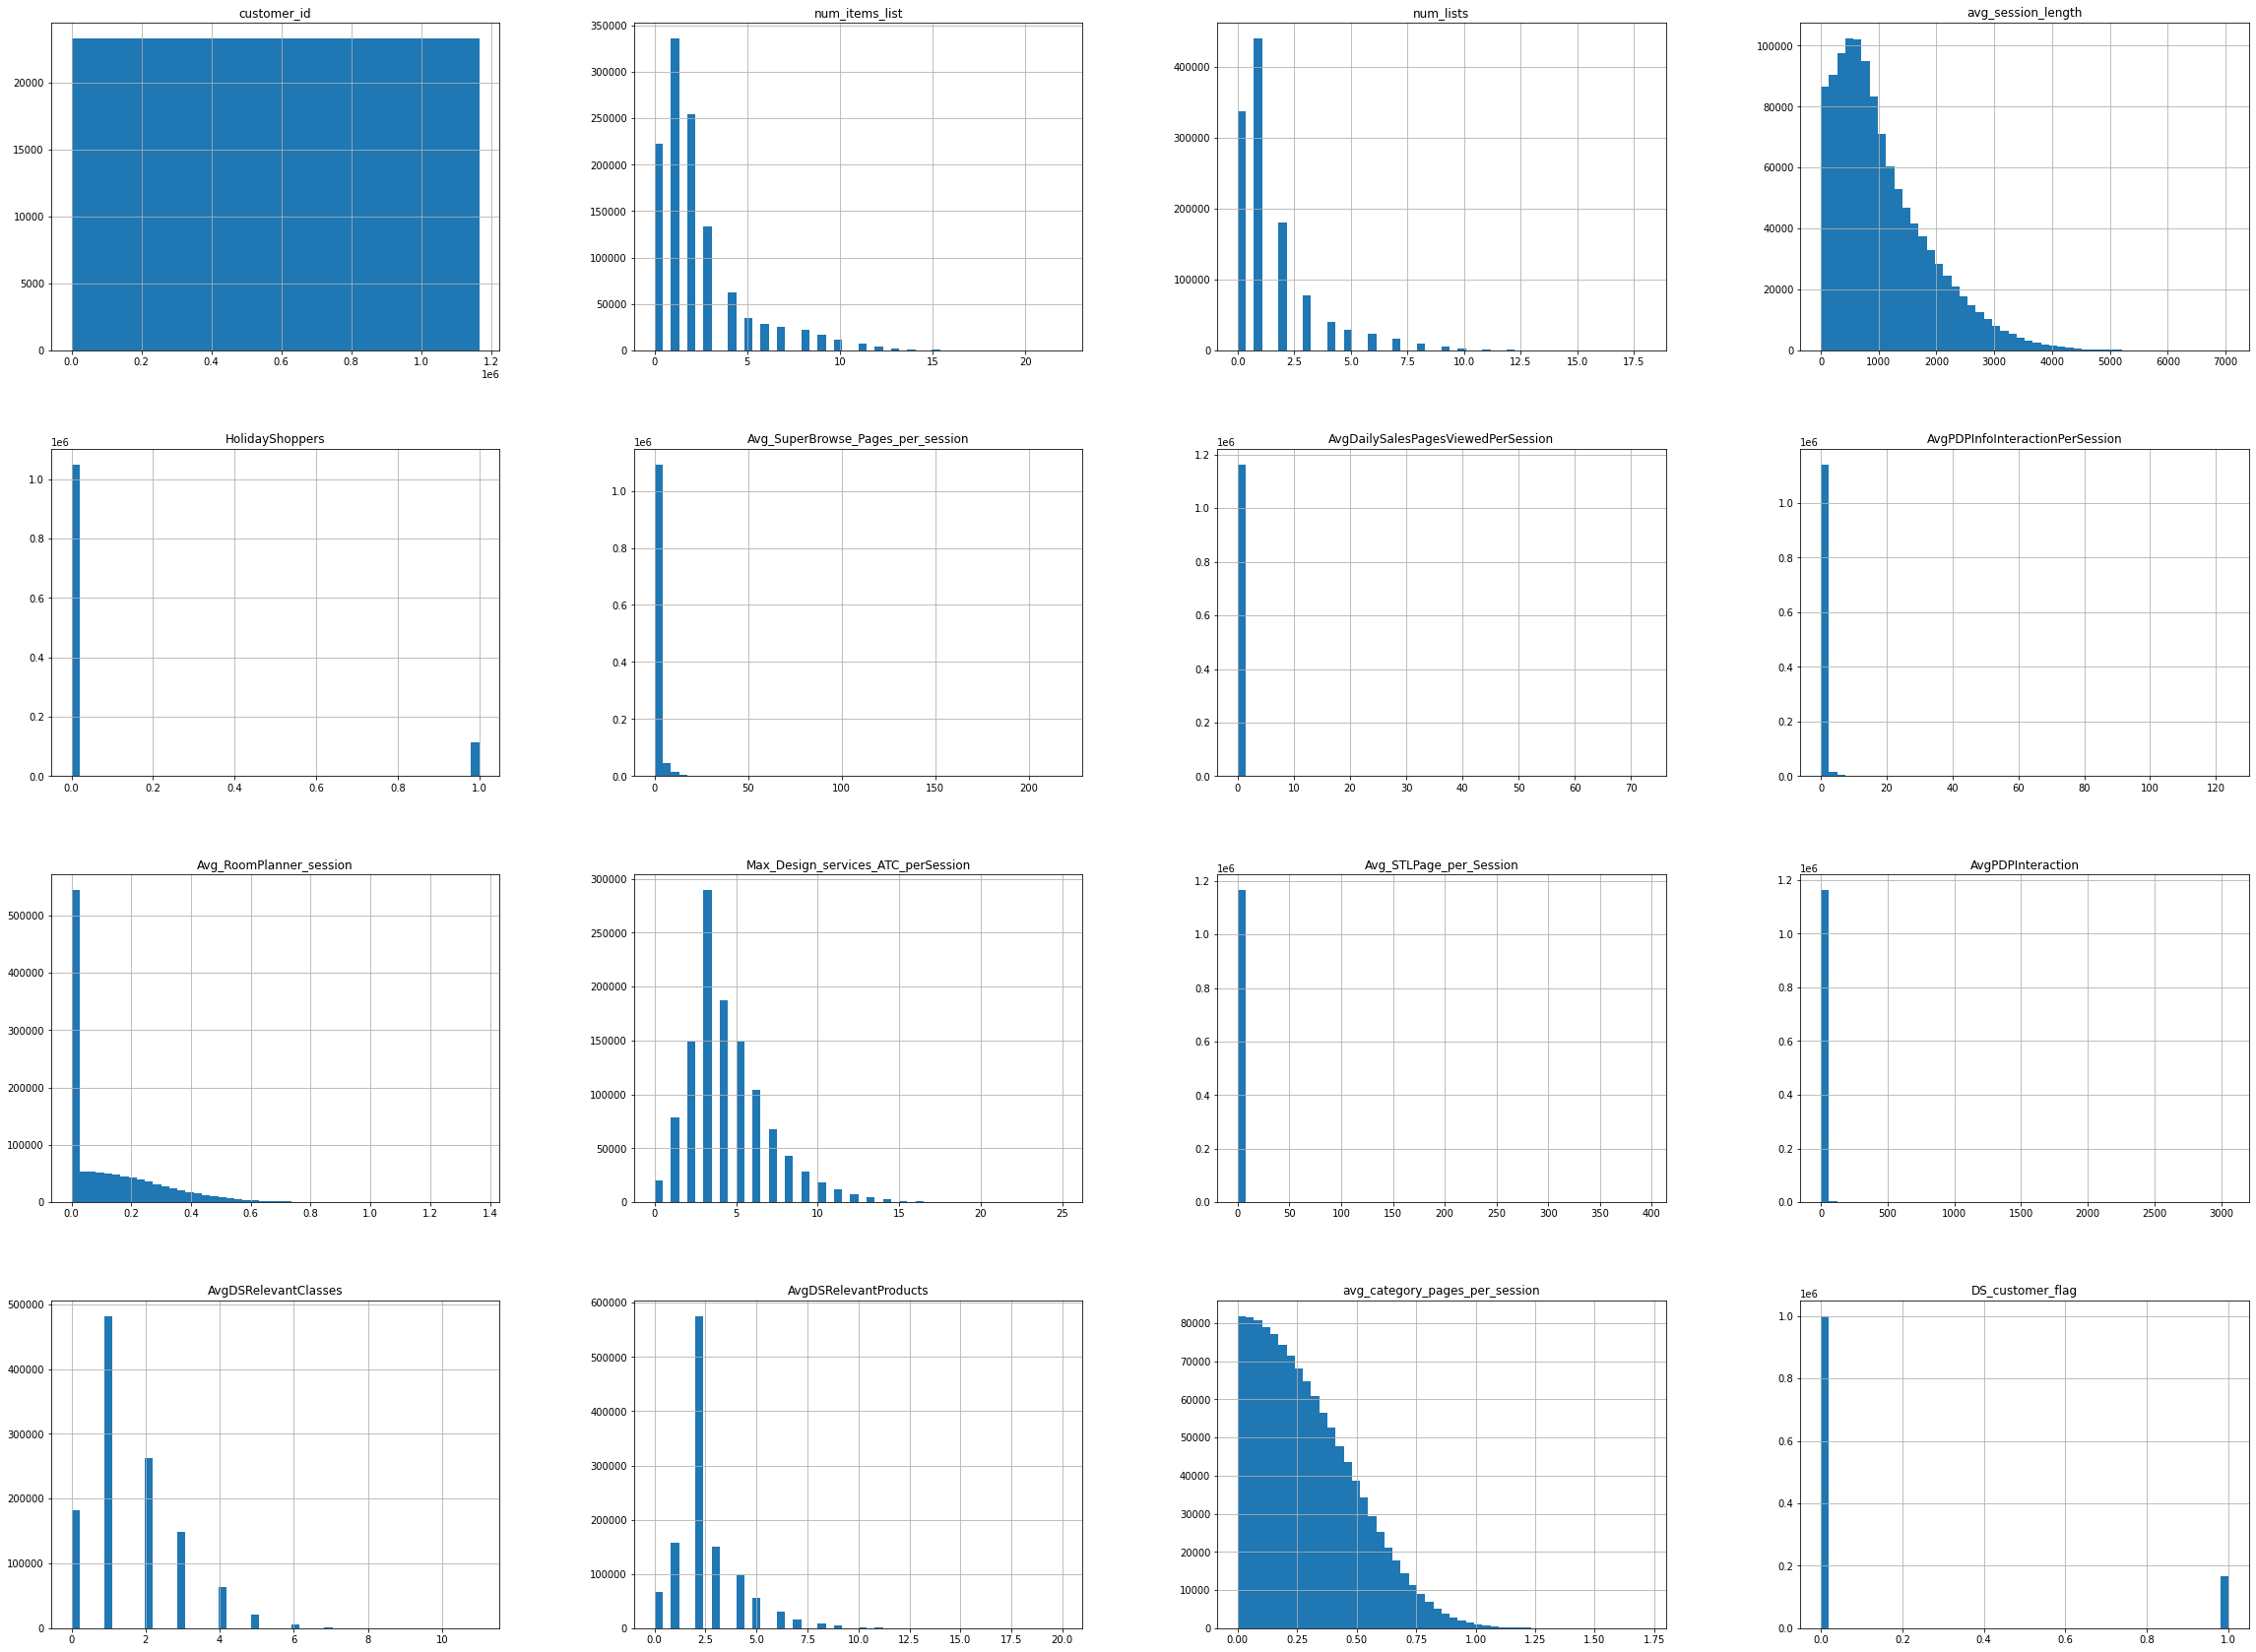

In [11]:
df2.hist(bins=50, figsize=(40, 30))

In [12]:
# qa
print(df.shape)
print(df2.shape)

(1166192, 24)
(1166192, 19)


**Correlation Analysis**


Correlation Matrix

In [13]:
df2.corr()

,customer_id,num_items_list,num_lists,avg_session_length,HolidayShoppers,Avg_SuperBrowse_Pages_per_session,AvgDailySalesPagesViewedPerSession,AvgPDPInfoInteractionPerSession,Avg_RoomPlanner_session,Max_Design_services_ATC_perSession,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,DS_customer_flag
customer_id,1.000000,0.475878,0.429580,-0.132694,-0.001452,0.000203,0.074869,0.097451,0.083008,0.328345,0.041669,0.091958,0.001673,0.241577,0.185152,0.605474
num_items_list,0.475878,1.000000,0.558466,-0.171948,0.000011,-0.000613,0.017224,0.027131,0.108040,0.427040,0.015838,0.030225,-0.000412,0.313983,0.239931,0.786736
num_lists,0.429580,0.558466,1.000000,-0.155179,0.000068,-0.000254,0.014935,0.024342,0.097857,0.386051,0.014016,0.026114,0.000287,0.283014,0.216365,0.710014
avg_session_length,-0.132694,-0.171948,-0.155179,1.000000,0.000284,0.000550,-0.002698,-0.008146,-0.030172,-0.118051,-0.006288,-0.008092,-0.000751,-0.086661,-0.065069,-0.218588
HolidayShoppers,-0.001452,0.000011,0.000068,0.000284,1.000000,0.001976,-0.001953,0.000804,0.000790,-0.001334,0.000346,0.000400,0.000745,-0.000633,-0.001476,-0.001304
Avg_SuperBrowse_Pages_per_session,0.000203,-0.000613,-0.000254,0.000550,0.001976,1.000000,-0.000314,-0.001037,0.000643,0.001874,-0.000661,-0.000991,0.001177,-0.000238,-0.000301,0.000152
AvgDailySalesPagesViewedPerSession,0.074869,0.017224,0.014935,-0.002698,-0.001953,-0.000314,1.000000,0.022997,0.002868,0.011237,0.030936,0.024274,0.000973,0.008365,0.004846,0.020980
AvgPDPInfoInteractionPerSession,0.097451,0.027131,0.024342,-0.008146,0.000804,-0.001037,0.022997,1.000000,0.005071,0.018180,0.022192,0.221028,-0.000136,0.015515,0.010699,0.034309
Avg_RoomPlanner_session,0.083008,0.108040,0.097857,-0.030172,0.000790,0.000643,0.002868,0.005071,1.000000,0.076334,0.003968,0.005435,0.002193,0.054385,0.041185,0.137189
Max_Design_services_ATC_perSession,0.328345,0.427040,0.386051,-0.118051,-0.001334,0.001874,0.011237,0.018180,0.076334,1.000000,0.010032,0.018173,-0.000309,0.215043,0.165184,0.542817


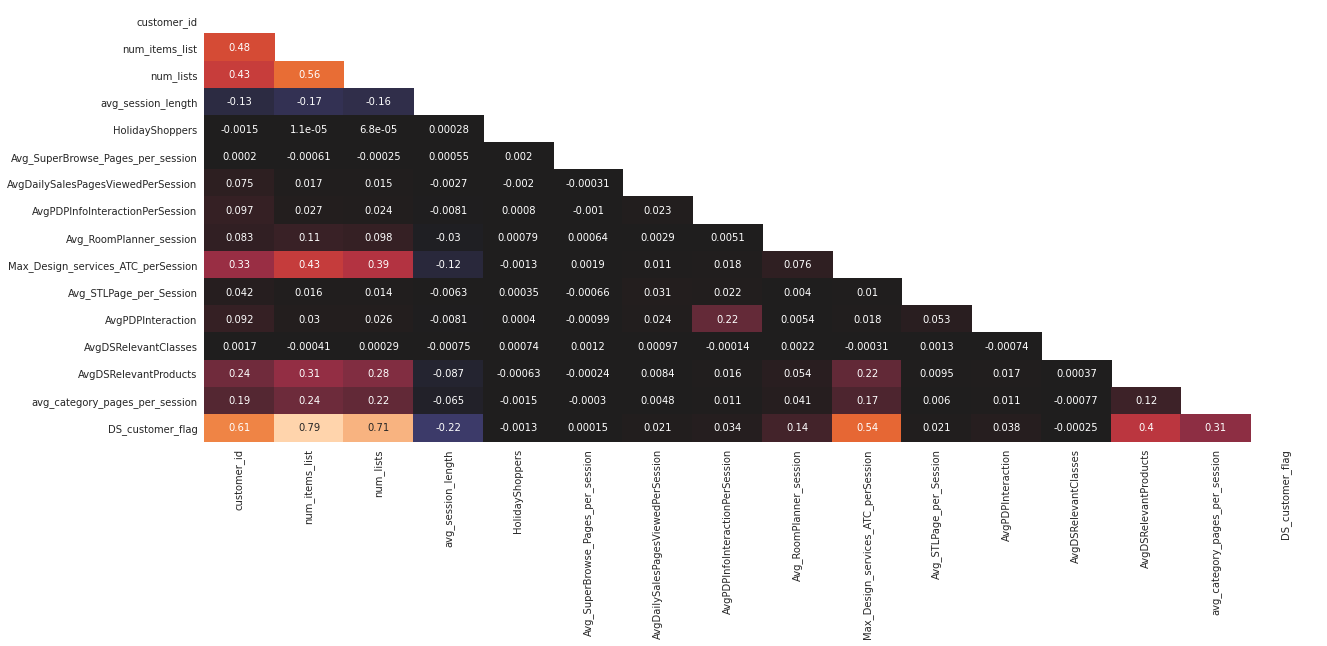

In [14]:
# plot heatmap of the correlation matrix (remove diagonal and redundant part)
plt.figure(figsize = (20,8))
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  sns.heatmap(df2.corr(), mask=mask, center=0, cbar=False, annot=True)

# Data preprocessing

In [15]:
df2.head()

,customer_id,num_items_list,num_lists,avg_session_length,geos,HolidayShoppers,Avg_SuperBrowse_Pages_per_session,Visitor_type,gender,AvgDailySalesPagesViewedPerSession,AvgPDPInfoInteractionPerSession,Avg_RoomPlanner_session,Max_Design_services_ATC_perSession,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,DS_customer_flag
0,583266,1,0.0,687.680478,Rural,0,0.000000,Active,Female,0.0,0.0,0.000000,4.0,0.0,0.0,0.0,2.0,0.129386,0
1,507698,1,2.0,1066.967614,Rural,0,0.000000,Active,Female,0.0,0.0,0.037361,6.0,0.0,0.0,1.0,1.0,0.166618,0
2,889449,1,0.0,2097.104262,Unknown,0,0.000000,Acquired,Female,0.0,0.4,0.000193,7.0,0.0,0.0,1.0,1.0,0.296956,0
3,477756,2,0.0,64.789735,Unknown,0,0.333333,New,Unknown,0.0,0.0,0.133602,2.0,0.0,0.0,4.0,4.0,0.126711,0
4,557413,0,2.0,853.492792,Unknown,0,30.500000,Returning,Female,0.0,0.0,0.000000,3.0,0.0,0.0,0.0,1.0,0.420142,0


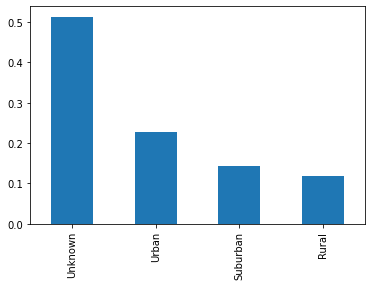

In [16]:
df2.geos.value_counts(normalize=True).plot(kind='bar')

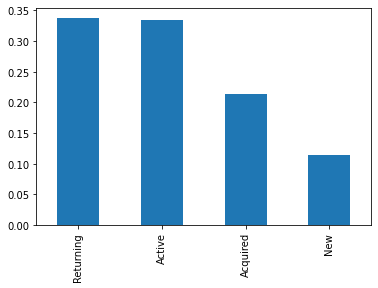

In [17]:
df2.Visitor_type.value_counts(normalize=True).plot(kind='bar')

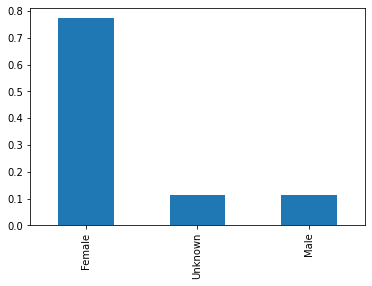

In [18]:
df2.gender.value_counts(normalize=True).plot(kind='bar')

In [19]:
df2_geos = pd.get_dummies(df2.geos, prefix='geos')
df2_gender = pd.get_dummies(df2.gender, prefix='gender')

df2_gender.head()
df2_geos.head()

,geos_Rural,geos_Suburban,geos_Unknown,geos_Urban
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [20]:
# ordinal encoding the visitor type field
ordinal_code = {"Visitor_type":  {"New": 1, "Returning": 2, "Acquired":3, "Active":4}}

# replace ordinal features with numerics
df2_vt = df2[['Visitor_type']]
df2_vt = df2_vt.replace(ordinal_code)

# show top 5 rows
df2_vt.head()

,Visitor_type
0,4
1,4
2,3
3,1
4,2


In [21]:
df2.drop( ['geos', 'gender', 'Visitor_type'], axis=1, inplace=True)
df3 = pd.concat([df2, df2_gender, df2_geos, df2_vt ], axis=1)

# Review of the processed data

In [22]:
df3.head()

,customer_id,num_items_list,num_lists,avg_session_length,HolidayShoppers,Avg_SuperBrowse_Pages_per_session,AvgDailySalesPagesViewedPerSession,AvgPDPInfoInteractionPerSession,Avg_RoomPlanner_session,Max_Design_services_ATC_perSession,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,DS_customer_flag,gender_Female,gender_Male,gender_Unknown,geos_Rural,geos_Suburban,geos_Unknown,geos_Urban,Visitor_type
0,583266,1,0.0,687.680478,0,0.000000,0.0,0.0,0.000000,4.0,0.0,0.0,0.0,2.0,0.129386,0,1,0,0,1,0,0,0,4
1,507698,1,2.0,1066.967614,0,0.000000,0.0,0.0,0.037361,6.0,0.0,0.0,1.0,1.0,0.166618,0,1,0,0,1,0,0,0,4
2,889449,1,0.0,2097.104262,0,0.000000,0.0,0.4,0.000193,7.0,0.0,0.0,1.0,1.0,0.296956,0,1,0,0,0,0,1,0,3
3,477756,2,0.0,64.789735,0,0.333333,0.0,0.0,0.133602,2.0,0.0,0.0,4.0,4.0,0.126711,0,0,0,1,0,0,1,0,1
4,557413,0,2.0,853.492792,0,30.500000,0.0,0.0,0.000000,3.0,0.0,0.0,0.0,1.0,0.420142,0,1,0,0,0,0,1,0,2


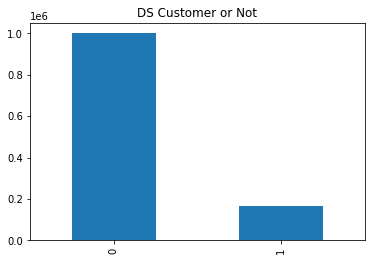

In [23]:
df3.DS_customer_flag.value_counts().plot(kind='bar',title='DS Customer or Not')

# Resampling

In [24]:
# Get the number of each class
major_class = df3[df3["DS_customer_flag"]==0]
minor_class = df3[df3["DS_customer_flag"]==1]
print("Major class: ",major_class.shape[0])
print("Minor class: ",minor_class.shape[0])

Major class:  1000000
Minor class:  166192


Random down sample (Method A)

New Major class:  166192


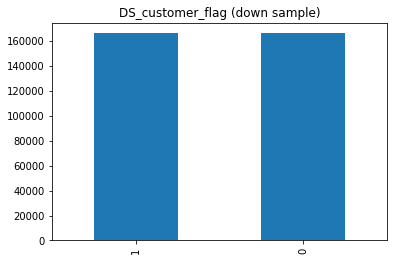

In [67]:
# Down sample major class
down_sample = major_class.sample(n=minor_class.shape[0])
print("New Major class: ", down_sample.shape[0])

# Combine them to get the balanced data
balanced_1 = pd.concat([down_sample,minor_class]).reset_index(drop=True)

# Check if "DS_customer_flag" is a balanced class now
balanced_1.DS_customer_flag.value_counts().plot(kind='bar', title='DS_customer_flag (down sample)')

Up sample minority class (method B)

In [69]:
# plot 2-dimensional
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


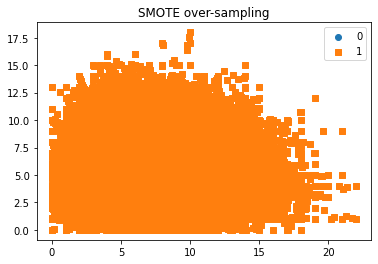

In [70]:
# import library
from imblearn.over_sampling import SMOTE

# https://colab.research.google.com/drive/18DHW2rI0N48cflgM4Z_MJXVZCExWTN8d?usp=sharing#scrollTo=xMOazoBcaYgf

# resample the minority class using SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

# plot
plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

# Modelling

In [28]:
# seperate X and y

# X = df3.drop(columns=['DS_customer_flag', 'customer_id'])
# y = df3.DS_customer_flag

X = balanced_1.drop(columns=['DS_customer_flag', 'customer_id'])
y = balanced_1.DS_customer_flag

In [29]:
# splitting the data into training and testing sets
# read more about the function here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# import library
import sklearn
from sklearn.model_selection import train_test_split

# randomly split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# print the dimensions
print("X training shape ", X_train.shape)
print("X testing shape ",X_test.shape)
print("y training shape ",y_train.shape)
print("y testing shape ",y_test.shape)

X training shape  (932953, 22)
X testing shape  (233239, 22)
y training shape  (932953,)
y testing shape  (233239,)


Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_prediction = lr.predict(X_test)
Score = accuracy_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

print("Logistic Regression Score: ", Score)
print("Logistic Regression Report: \n", Report)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Score:  0.9789657818803887
Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    200048
           1       0.93      0.92      0.93     33191

    accuracy                           0.98    233239
   macro avg       0.96      0.95      0.96    233239
weighted avg       0.98      0.98      0.98    233239



Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train).predict(X_test)

y_prediction = dt.predict(X_test)
Score = accuracy_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

print("Decision Tree Score: ",Score)
print("Decision Tree Report: \n", Report)

Decision Tree Score:  0.9852897671487187
Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    200048
           1       0.95      0.95      0.95     33191

    accuracy                           0.99    233239
   macro avg       0.97      0.97      0.97    233239
weighted avg       0.99      0.99      0.99    233239



Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)
Score = accuracy_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)
c_matrix=confusion_matrix(y_test, y_prediction)

print("Random Forest Score: ",Score)
print("Random Forest Report: \n", Report)
print("Random Forest Confusion Matrix: \n",c_matrix)

Random Forest Score:  0.9902074695912776
Random Forest Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    200048
           1       0.98      0.95      0.96     33191

    accuracy                           0.99    233239
   macro avg       0.99      0.97      0.98    233239
weighted avg       0.99      0.99      0.99    233239

Random Forest Confusion Matrix: 
 [[199498    550]
 [  1734  31457]]


# Results

# Data List

![](https://i.imgur.com/yR2eyAz.png)
![](https://i.imgur.com/7i4IBdA.png)